In [1]:
## Step 1: Load and Filter Inpatient Data

##We begin by loading the 2016 Q4 Texas ED PUDF dataset. We then identify the top 5 hospitals with the highest number of elective admissions and filter the dataset to include only those hospitals and the relevant admission types ('1' = Emergency, '3' = Elective).#TEXAS EMERGENCY DEPARTMENT 2016 PUBLIC USE DATA

import pandas as pd
import numpy as np

#ain base file for ED outpatient AND inpatient visits
df = pd.read_csv('ED-OP_base_4q2016_tab.txt', sep='\t', low_memory=False)
inpatient_df = pd.read_csv('ED-IP_base1_4q2016_tab.txt', sep='\t', low_memory=False)

print(df.shape)
print(df.columns.tolist())
df.head()


(2260107, 129)
['SERVICE_QUARTER', 'RECORD_ID', 'THCIC_ID', 'SPEC_UNIT_1', 'SPEC_UNIT_2', 'SPEC_UNIT_3', 'SPEC_UNIT_4', 'SPEC_UNIT_5', 'SEX_CODE', 'PAT_COUNTY', 'PAT_STATE', 'PAT_ZIP', 'PAT_COUNTRY', 'PUBLIC_HEALTH_REGION', 'LENGTH_OF_SERVICE', 'PAT_AGE', 'RACE', 'ETHNICITY', 'FIRST_PAYMENT_SRC', 'SECONDARY_PAYMENT_SRC', 'TYPE_OF_BILL', 'CONDITION_CODE_1', 'CONDITION_CODE_2', 'CONDITION_CODE_3', 'CONDITION_CODE_4', 'CONDITION_CODE_5', 'CONDITION_CODE_6', 'CONDITION_CODE_7', 'CONDITION_CODE_8', 'PAT_REASON_FOR_VISIT', 'PRINC_DIAG_CODE', 'OTH_DIAG_CODE_1', 'OTH_DIAG_CODE_2', 'OTH_DIAG_CODE_3', 'OTH_DIAG_CODE_4', 'OTH_DIAG_CODE_5', 'OTH_DIAG_CODE_6', 'OTH_DIAG_CODE_7', 'OTH_DIAG_CODE_8', 'OTH_DIAG_CODE_9', 'OTH_DIAG_CODE_10', 'OTH_DIAG_CODE_11', 'OTH_DIAG_CODE_12', 'OTH_DIAG_CODE_13', 'OTH_DIAG_CODE_14', 'OTH_DIAG_CODE_15', 'OTH_DIAG_CODE_16', 'OTH_DIAG_CODE_17', 'OTH_DIAG_CODE_18', 'OTH_DIAG_CODE_19', 'OTH_DIAG_CODE_20', 'OTH_DIAG_CODE_21', 'OTH_DIAG_CODE_22', 'OTH_DIAG_CODE_23', 'OTH_DI

,SERVICE_QUARTER,RECORD_ID,THCIC_ID,SPEC_UNIT_1,SPEC_UNIT_2,SPEC_UNIT_3,SPEC_UNIT_4,SPEC_UNIT_5,SEX_CODE,PAT_COUNTY,...,TOTAL_NON_COV_CHARGES,TOTAL_CHARGES_ANCIL,TOTAL_NON_COV_CHARGES_ANCIL,PHYSICIAN1_INDEX_NUMBER,PHYSICIAN2_INDEX_NUMBER,INPUT_FORMAT,SOURCE_OF_ADMISSION,PAT_STATUS,PROVIDER_NAME,Unnamed: 128
0,2016Q3,320160797402,788003,NaN,NaN,NaN,NaN,NaN,F,67.0,...,0.0,900.00,0.0,NaN,2202491546,1,1,01,Christus St Michael Hospital Atlanta,NaN
1,2016Q3,320160797403,788003,NaN,NaN,NaN,NaN,NaN,F,67.0,...,0.0,900.00,0.0,NaN,2202491546,1,1,01,Christus St Michael Hospital Atlanta,NaN
2,2016Q3,320160797404,788003,NaN,NaN,NaN,NaN,NaN,M,67.0,...,0.0,3400.00,0.0,NaN,2202491546,1,1,07,Christus St Michael Hospital Atlanta,NaN
3,2016Q3,320160824140,400000,NaN,NaN,NaN,NaN,NaN,M,489.0,...,0.0,4729.90,0.0,NaN,1588689602,1,1,01,Valley Baptist Medical Center,NaN
4,2016Q3,320160824141,400000,NaN,NaN,NaN,NaN,NaN,F,61.0,...,0.0,2645.28,0.0,NaN,6140572119,1,1,01,Valley Baptist Medical Center,NaN


In [2]:
print(inpatient_df.shape)

(368588, 167)


In [3]:
df.columns.tolist() 

['SERVICE_QUARTER',
 'RECORD_ID',
 'THCIC_ID',
 'SPEC_UNIT_1',
 'SPEC_UNIT_2',
 'SPEC_UNIT_3',
 'SPEC_UNIT_4',
 'SPEC_UNIT_5',
 'SEX_CODE',
 'PAT_COUNTY',
 'PAT_STATE',
 'PAT_ZIP',
 'PAT_COUNTRY',
 'PUBLIC_HEALTH_REGION',
 'LENGTH_OF_SERVICE',
 'PAT_AGE',
 'RACE',
 'ETHNICITY',
 'FIRST_PAYMENT_SRC',
 'SECONDARY_PAYMENT_SRC',
 'TYPE_OF_BILL',
 'CONDITION_CODE_1',
 'CONDITION_CODE_2',
 'CONDITION_CODE_3',
 'CONDITION_CODE_4',
 'CONDITION_CODE_5',
 'CONDITION_CODE_6',
 'CONDITION_CODE_7',
 'CONDITION_CODE_8',
 'PAT_REASON_FOR_VISIT',
 'PRINC_DIAG_CODE',
 'OTH_DIAG_CODE_1',
 'OTH_DIAG_CODE_2',
 'OTH_DIAG_CODE_3',
 'OTH_DIAG_CODE_4',
 'OTH_DIAG_CODE_5',
 'OTH_DIAG_CODE_6',
 'OTH_DIAG_CODE_7',
 'OTH_DIAG_CODE_8',
 'OTH_DIAG_CODE_9',
 'OTH_DIAG_CODE_10',
 'OTH_DIAG_CODE_11',
 'OTH_DIAG_CODE_12',
 'OTH_DIAG_CODE_13',
 'OTH_DIAG_CODE_14',
 'OTH_DIAG_CODE_15',
 'OTH_DIAG_CODE_16',
 'OTH_DIAG_CODE_17',
 'OTH_DIAG_CODE_18',
 'OTH_DIAG_CODE_19',
 'OTH_DIAG_CODE_20',
 'OTH_DIAG_CODE_21',
 'OTH_DIAG_

In [4]:
# Get top 5 hospitals by visit count
top_5_hospitals = inpatient_df['PROVIDER_NAME'].value_counts().head(5).index.tolist()

filtered_df = inpatient_df[inpatient_df['PROVIDER_NAME'].isin(top_5_hospitals)]

# Crosstab of admission type by hospital
admission_counts = pd.crosstab(
    filtered_df['PROVIDER_NAME'],
    filtered_df['TYPE_OF_ADMISSION']
)

admission_counts.rename(columns={
    '1': 'Emergency',
    '3': 'Elective'
}, inplace=True)

print(admission_counts)


TYPE_OF_ADMISSION                                   1.0   2.0  3.0  4.0  5.0  \
PROVIDER_NAME                                                                  
Baylor University Medical Center                     23  5025   29    0  485   
John Peter Smith Hospital                          4316    44   12    1  454   
Memorial Hermann Hospital                          4707    69    2    1    0   
Parkland Memorial Hospital                         8061     4   20    0    1   
Texas Health Harris Methodist Hospital-Fort Worth  6520     2    9    0    0   

TYPE_OF_ADMISSION                                  9.0  
PROVIDER_NAME                                           
Baylor University Medical Center                    10  
John Peter Smith Hospital                            0  
Memorial Hermann Hospital                            0  
Parkland Memorial Hospital                           1  
Texas Health Harris Methodist Hospital-Fort Worth    1  


In [5]:
# Filter rows where TYPE_OF_ADMISSION == 3 (Elective)
elective_df = inpatient_df[inpatient_df['TYPE_OF_ADMISSION'] == 3]

# Count elective admissions per hospital and get top 5
elective_counts = elective_df['PROVIDER_NAME'].value_counts().head(7)

print("Top 5 hospitals by Elective admissions:")
print(elective_counts)


Top 5 hospitals by Elective admissions:
PROVIDER_NAME
Christus Mother Frances Hospital Tyler       805
Baptist St Anthonys Hospital                 727
Womans Hospital-Texas                        411
Methodist Specialty & Transplant Hospital    405
Green Oaks Hospital                          327
Longview Regional Medical Center             325
Methodist Stone Oak Hospital                 267
Name: count, dtype: int64


In [6]:
# Define the top 5 hospitals by elective admissions
top_5_elective_hospitals = [
    'Christus Mother Frances Hospital Tyler',
    'Baptist St Anthonys Hospital',
    'Womans Hospital-Texas',
    'Methodist Specialty & Transplant Hospital',
    'Green Oaks Hospital'
   
]

# Filter for TYPE_OF_ADMISSION == 1.0 (Emergency) and top 5 elective hospitals
emergency_df = inpatient_df[
    (inpatient_df['TYPE_OF_ADMISSION'] == 1.0) &
    (inpatient_df['PROVIDER_NAME'].isin(top_5_elective_hospitals))
]

# Count Emergency admissions per hospital
emergency_counts = emergency_df['PROVIDER_NAME'].value_counts()

print("Emergency admissions for Top 5 Elective Hospitals:")
print(emergency_counts)


Emergency admissions for Top 5 Elective Hospitals:
PROVIDER_NAME
Christus Mother Frances Hospital Tyler       2718
Womans Hospital-Texas                        1335
Methodist Specialty & Transplant Hospital    1016
Green Oaks Hospital                           668
Name: count, dtype: int64


In [7]:
pip install dowhy


Note: you may need to restart the kernel to use updated packages.


In [14]:
## Step 2: Preprocessing and Feature Engineering
##We retain only the necessary columns for analysis, encode categorical variables (sex, race, first payment source), and create a binary treatment variable where 1 = Emergency and 0 = Elective. 
##This prepares the data for causal inference modeling.
import pandas as pd
from dowhy import CausalModel
from sklearn.preprocessing import LabelEncoder 

# Define your selected hospitals
selected_hospitals = [
    'Christus Mother Frances Hospital Tyler',
    'Womans Hospital-Texas',
    'Methodist Specialty & Transplant Hospital',
    'Green Oaks Hospital'
]

# Filter to only those hospitals and relevant admissions (1.0 = Emergency, 3.0 = Elective)
causal_df = inpatient_df[
    (inpatient_df['PROVIDER_NAME'].isin(selected_hospitals)) &
    (inpatient_df['TYPE_OF_ADMISSION'].isin([1.0, 3.0]))
].copy()

# Keep only the necessary columns
causal_df = causal_df[[
    'PROVIDER_NAME', 'TYPE_OF_ADMISSION', 'TOTAL_CHARGES',
    'PAT_AGE', 'SEX_CODE', 'RACE', 'FIRST_PAYMENT_SRC'
]].dropna()

# Create binary treatment variable: 1 = Emergency, 0 = Elective
causal_df['treatment'] = causal_df['TYPE_OF_ADMISSION'].apply(lambda x: 1 if x == 1.0 else 0)

# Encode categorical covariates
le_sex = LabelEncoder()
le_race = LabelEncoder()
le_payment = LabelEncoder()

causal_df['sex'] = le_sex.fit_transform(causal_df['SEX_CODE'].astype(str))
causal_df['race'] = le_race.fit_transform(causal_df['RACE'].astype(str))
causal_df['payment'] = le_payment.fit_transform(causal_df['FIRST_PAYMENT_SRC'].astype(str))

# Define covariates for causal graph
covariates = ['PAT_AGE', 'sex', 'race', 'payment']


/opt/anaconda3/envs/hf-safe/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
## Step 3: Estimate ATE Per Hospital using DoWhy
##For each hospital, we build a causal model using the DoWhy library. 
##We estimate the Average Treatment Effect (ATE) of admission type (emergency vs elective) on total charges, adjusting for patient demographics and payment source.
##Results are stored for meta-analysis.

from dowhy import CausalModel

# Store results
ate_results = {}

for hospital in selected_hospitals:
    print(f"\n📍 Running causal analysis for: {hospital}")
    
    # Subset data for current hospital
    hospital_df = causal_df[causal_df['PROVIDER_NAME'] == hospital].copy()
    
    # Skip if not enough samples
    if hospital_df['treatment'].nunique() < 2:
        print(f"⚠️ Skipping {hospital}: not enough variation in treatment.")
        continue

    # Build causal model
    model = CausalModel(
        data=hospital_df,
        treatment='treatment',
        outcome='TOTAL_CHARGES',
        common_causes=covariates
    )
    
    # Identify causal effect
    identified_estimand = model.identify_effect()
    
    # Estimate effect using propensity score matching
    estimate = model.estimate_effect(
        identified_estimand,
        method_name="backdoor.propensity_score_matching"
    )
    
    # Store ATE value
    ate_results[hospital] = estimate.value
    
    print(f"✅ Estimated ATE for {hospital}: {estimate.value:.2f}")




📍 Running causal analysis for: Christus Mother Frances Hospital Tyler
✅ Estimated ATE for Christus Mother Frances Hospital Tyler: 2797.78

📍 Running causal analysis for: Womans Hospital-Texas
✅ Estimated ATE for Womans Hospital-Texas: 5055.10

📍 Running causal analysis for: Methodist Specialty & Transplant Hospital
✅ Estimated ATE for Methodist Specialty & Transplant Hospital: 9537.06

📍 Running causal analysis for: Green Oaks Hospital
✅ Estimated ATE for Green Oaks Hospital: 6350.44


In [10]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding- CHECK
for col, new_col in {
    'SEX_CODE': 'sex',
    'RACE': 'race',
    'FIRST_PAYMENT_SRC': 'payment'
}.items():
    le = LabelEncoder()
    causal_df[new_col] = le.fit_transform(causal_df[col].astype(str))


NameError: name 'causal_df' is not defined

In [16]:
covariates = ['PAT_AGE', 'sex', 'race', 'payment']  # All numeric


In [17]:
## Step 4: Simulating Federated Causal Inference with FedProx
##We simulate a federated learning environment by assigning each hospital its own local dataset. 
##We iteratively update local models and aggregate their parameters, applying FedProx-style regularization to constrain them around a shared global model.

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define FedProx parameters
mu = 0.01             # Regularization strength
n_rounds = 10         # Iterations for FedProx updates

# Step 1: Initialize global parameter (ATE estimate)
global_beta = None

# Step 2: Store per-hospital data
site_data = {
    hospital: causal_df[causal_df['PROVIDER_NAME'] == hospital].copy()
    for hospital in selected_hospitals
}

def get_X_y(df):
    cols = ['treatment'] + covariates
    # Ensure all values are numeric and in float format
    X = df[cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).values
    y = pd.to_numeric(df['TOTAL_CHARGES'], errors='coerce').fillna(0).astype(float).values
    return X, y

# Step 4: FedProx iteration
for r in range(n_rounds):
    local_betas = []

    for site, df in site_data.items():
        X, y = get_X_y(df)
        
        # If no global model yet, just run vanilla regression
        if global_beta is None:
            model = LinearRegression(fit_intercept=False)
            model.fit(X, y)
            local_betas.append(model.coef_)
        else:
            # Solve FedProx: Ridge regression centered around global_beta
            XTX = X.T @ X
            XTy = X.T @ y
            I = np.identity(X.shape[1])
            prox = mu * (global_beta if global_beta is not None else np.zeros(X.shape[1]))
            beta = np.linalg.inv(XTX + mu * I) @ (XTy + mu * prox)
            local_betas.append(beta)

    # Update global model: average of local betas
    global_beta = np.mean(local_betas, axis=0)

# Step 5: Extract FedProx ATE (coefficient for treatment)
fedprox_ate = global_beta[0]
print(f"✅ Final FedProx ATE (Emergency - Elective): {fedprox_ate:.2f}")



✅ Final FedProx ATE (Emergency - Elective): 6844.71


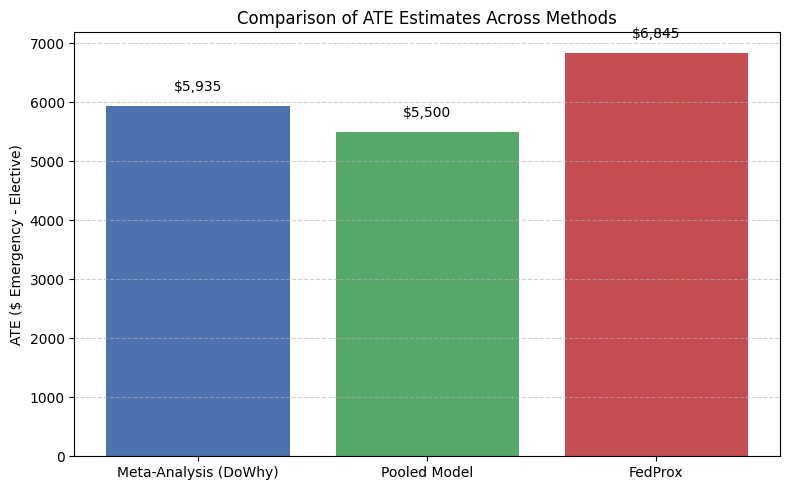

In [18]:
## Step 6: Visualizing ATE Estimates
##We visualize and compare the ATEs obtained from three different approaches: per-hospital meta-analysis (DoWhy), pooled model (placeholder), and FedProx. 
##This helps us understand how estimates vary based on modeling strategy and data centralization.


import matplotlib.pyplot as plt
import numpy as np

# ATE results from previous steps
ate_results = {
    'Christus Mother Frances Hospital Tyler': 2797.78,
    'Womans Hospital-Texas': 5055.10,
    'Methodist Specialty & Transplant Hospital': 9537.06,
    'Green Oaks Hospital': 6350.44
}

# Step 1: Calculate meta-analysis ATE (mean of DoWhy ATEs)
meta_ate = np.mean(list(ate_results.values()))

# Step 2: Placeholder for pooled model ATE (update if available)
pooled_ate = 5500.00

# Step 3: Your final FedProx ATE
fedprox_ate = 6844.71

# Step 4: Combine into a single comparison dictionary
ate_comparison = {
    "Meta-Analysis (DoWhy)": meta_ate,
    "Pooled Model": pooled_ate,
    "FedProx": fedprox_ate
}

# Step 5: Plot
methods = list(ate_comparison.keys())
ates = list(ate_comparison.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, ates, color=['#4c72b0', '#55a868', '#c44e52'])
plt.ylabel('ATE ($ Emergency - Elective)')
plt.title('Comparison of ATE Estimates Across Methods')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 200, f"${height:,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


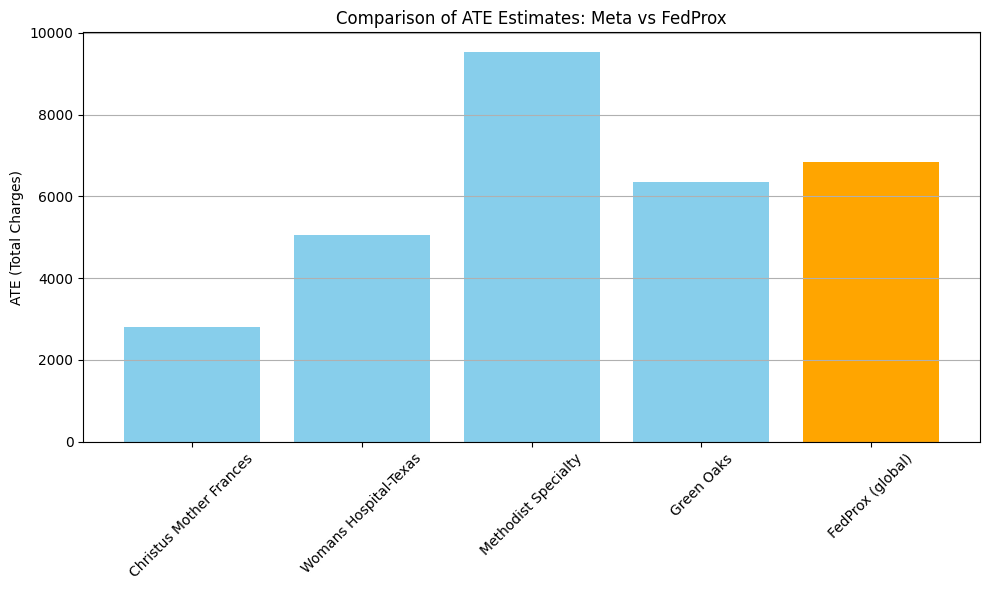

In [19]:
##Each blue bar represents what a single hospital would learn on its own (meta-analysis).
##The orange bar is the FedProx ATE — a federated estimate that blends the local models into one global understanding, without sharing patient-level data

import matplotlib.pyplot as plt

#ATEs
ate_values = {
    "Christus Mother Frances": 2797,
    "Womans Hospital-Texas": 5055,
    "Methodist Specialty": 9537,
    "Green Oaks": 6350,
    "FedProx (global)": 6844
}

# Color FedProx orange
colors = ['skyblue'] * 4 + ['orange']

plt.figure(figsize=(10, 6))
plt.bar(ate_values.keys(), ate_values.values(), color=colors)
plt.ylabel("ATE (Total Charges)")
plt.title("Comparison of ATE Estimates: Meta vs FedProx")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
